In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path("/content/drive/My Drive/SIH Datasets/Relevence_Dataset")

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')],
    batch_tfms=aug_transforms(mult=2)
).dataloaders(path)

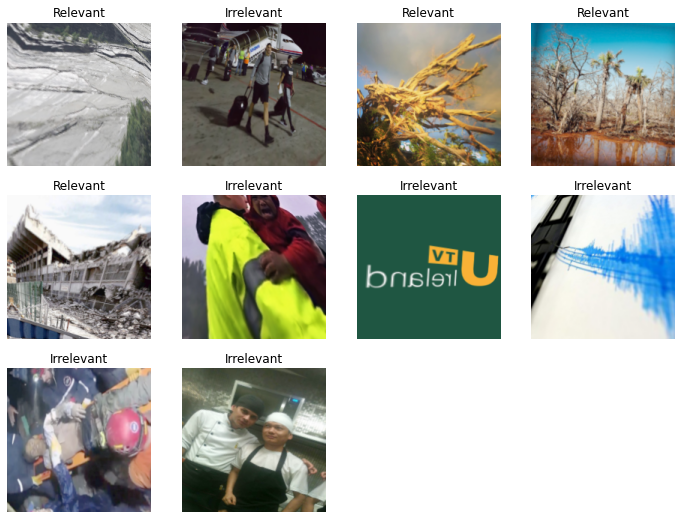

In [ ]:
dls.show_batch(max_n=10)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(10, cbs=SaveModelCallback())

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.830996,0.645674,0.841071,12:57


Better model found at epoch 0 with valid_loss value: 0.6456741690635681.


epoch,train_loss,valid_loss,accuracy,time
0,0.488110,0.409264,0.885714,17:12
1,0.386500,0.418401,0.875000,17:02
2,0.313211,0.452564,0.866071,17:07
3,0.269688,0.301245,0.896429,17:09
4,0.208962,0.277662,0.912500,17:06
5,0.158745,0.374970,0.891071,17:05
6,0.112644,0.348812,0.907143,17:07
7,0.083727,0.322215,0.907143,17:08
8,0.067287,0.321124,0.910714,17:08
9,0.058335,0.315952,0.912500,17:09


Better model found at epoch 0 with valid_loss value: 0.4092637300491333.
Better model found at epoch 3 with valid_loss value: 0.30124539136886597.
Better model found at epoch 4 with valid_loss value: 0.27766162157058716.


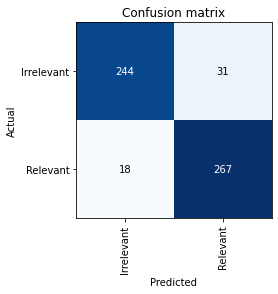

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

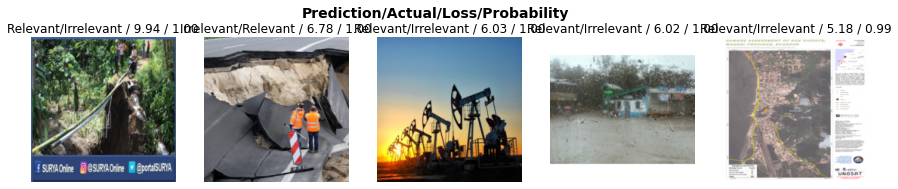

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export('rel_model.pkl')

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)